# Klasifikasi Berita Berdasarkan isi Berita Menggunakan Model Machine Learning (SVM, Naive Bayes, dan Random Forest)

---

Daniel Nomolas Wicaksono
A11.2022.14448

# Ringkasan dan Permasalahan Proyek

---

Dalam era digital, berita online semakin berkembang pesat dengan jumlah konten yang terus bertambah. Hal ini menciptakan kebutuhan untuk mengelompokkan berita berdasarkan isi agar dapat membantu pengguna mencari informasi secara efisien. Namun, tantangan utama yang dihadapi adalah bagaimana memastikan klasifikasi berita dilakukan secara akurat, cepat, dan konsisten, terutama ketika melibatkan berbagai kategori berita seperti olahraga, politik, teknologi, atau hiburan.

Penggunaan model machine learning menawarkan solusi untuk permasalahan ini. Model seperti Support Vector Machine (SVM), Naive Bayes, dan Random Forest telah dikenal sebagai algoritma yang efektif untuk tugas klasifikasi teks. Namun, setiap model memiliki kekuatan dan kelemahan yang berbeda, sehingga penting untuk mengevaluasi performa masing-masing model dalam konteks klasifikasi berita.

Permasalahan yang diangkat dalam proyek ini adalah:

    Bagaimana membangun sistem klasifikasi berita berdasarkan isi menggunakan model machine learning?
    Model mana yang memberikan performa terbaik dalam hal akurasi, presisi, recall, dan waktu eksekusi untuk klasifikasi berita?

# Alur 

---



In [154]:
from PIL import Image
from IPython.display import display

In [155]:
img = Image.open('bagan klasifikasi berita.drawio.png')

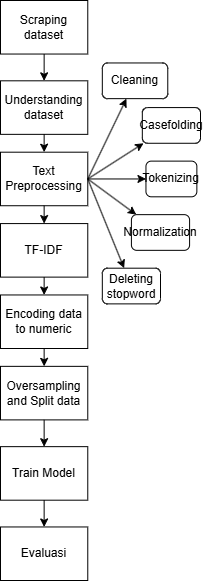

In [156]:
display(img)

Penjelasan Setiap Tahap:

---

1.Scraping Dataset

Mengumpulkan data teks dari berbagai sumber berita indonesia.

2.Memahami Dataset

Memahami attribut yang ada di dataset, mencari tahu adakah baris kosong pada dataset, mencari uniqu attribut pada kategori.

3.Text Preprocessing
Membersihkan dan mengubah data teks menjadi bentuk yang siap diolah oleh model.
Cleaning: Menghapus karakter-karakter yang tidak perlu (misal: angka, simbol).
Case Folding: Merubah semua huruf menjadi huruf kecil atau besar.
Tokenizing: Membagi teks menjadi kata-kata individual.
Normalisasi: Mengubah kata menjadi bentuk dasarnya (stemming atau lemmatization).
Menghapus Stopword: Menghapus kata-kata yang sering muncul namun tidak mengandung informasi penting (misal: "dan", "atau", "yang").

4.TF-IDF

Menghitung pentingnya setiap kata dalam dokumen.
TF: Frekuensi kemunculan kata dalam dokumen.
IDF: Bobot yang menunjukkan seberapa penting suatu kata dalam seluruh dataset.

5.Encoding Data ke Numerik

Mengubah data teks menjadi representasi numerik yang dapat dipahami oleh model.

6.Oversampling, Split Data

Mengatasi ketidakseimbangan kelas data (jika ada) dengan menambah jumlah data pada kelas minoritas.
Membagi data menjadi data latih dan data uji.

7.Train Model

Membangun dan melatih model machine learning pada data latih.
Pada kesempatan kali ini Menggunakan algoritma Naive Bayes, Support Vector Machine, dan Deepforest

Evaluasi

Mengevaluasi performa model menggunakan data uji.
 Menghitung akurasi, precision, recall, F1-score, dan membuat confusion matrix.

In [95]:
#untuk mengolah data
import pandas as pd
import numpy as np
import re
import string
import ast
from imblearn.over_sampling import SMOTE

#untuk pengolahan (membersihkan) teks
import nltk
from nltk import word_tokenize, FreqDist
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
from Sastrawi.StopWordRemover.StopWordRemoverFactory import StopWordRemoverFactory

#untuk visualisasi
import seaborn as sns
import matplotlib.pyplot as plt

from itertools import islice
import difflib

#untuk membangun model
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer, TfidfTransformer
from sklearn import model_selection, svm
from sklearn import naive_bayes
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression 
from sklearn.metrics import accuracy_score,recall_score, confusion_matrix, classification_report
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder

import pickle

In [101]:
df = pd.read_excel('dataset.xlsx')

# Memahami Dataset

In [102]:
df.head()

,Nomor,Article Title,Article Link,text,Kategori
0,1,"7 Hobi yang Bisa Datangkan Cuan di 2022, Ada H...",https://www.detik.com/edu/edutainment/d-588006...,Meski banyak orang menganggap hobi hanya sebat...,EDU
1,2,"Perbanyak Ahli Gunung Api, ITN Yogyakarta Buka...",https://www.detik.com/edu/perguruan-tinggi/d-5...,Institut Teknologi Nasional (ITN) Yogyakarta m...,EDU
2,3,"PTM Terbatas 2022 di Jakarta, Ini Aturan Kegia...",https://www.detik.com/edu/sekolah/d-5880075/pt...,Pemerintah Provinsi DKI Jakarta melalui Kepala...,EDU
3,4,Mengapa Perlu Menjaga Kelestarian Tanaman Baka...,https://www.detik.com/edu/detikpedia/d-5879161...,Tanaman bakau adalah salah satu ekosistem yang...,EDU
4,5,Cara Membuat Surat Lamaran Kerja yang Sempurna...,https://www.detik.com/edu/edutainment/d-587992...,Membuat Curriculum Vitae (CV) dan surat lamara...,EDU


In [103]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2493 entries, 0 to 2492
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Nomor          2493 non-null   int64 
 1   Article Title  2493 non-null   object
 2   Article Link   2493 non-null   object
 3   text           2493 non-null   object
 4   Kategori       2493 non-null   object
dtypes: int64(1), object(4)
memory usage: 97.5+ KB


In [104]:
#missing values:
#check data yang Nan
df.isna().sum()

Nomor            0
Article Title    0
Article Link     0
text             0
Kategori         0
dtype: int64

In [63]:
#shape of data:
text_df.shape

(2493, 2)

In [107]:
text_df['Article Content'] = text_df['Article Content'].astype(str)

In [108]:
print(text_df['Article Content'].apply(lambda x: len(x.split(' '))).sum())

718310


In [109]:
text_df['length'] = text_df['Article Content'].apply(len)
text_df.head()

,Kategori,Article Content,length
0,EDU,Meski banyak orang menganggap hobi hanya sebat...,3834
1,EDU,Institut Teknologi Nasional (ITN) Yogyakarta m...,2511
2,EDU,Pemerintah Provinsi DKI Jakarta melalui Kepala...,2698
3,EDU,Tanaman bakau adalah salah satu ekosistem yang...,2535
4,EDU,Membuat Curriculum Vitae (CV) dan surat lamara...,2247


In [110]:
text_df.Kategori.unique()

array(['EDU', 'HOT', 'FNC', 'NEWS', 'SPORT', 'OTO'], dtype=object)

In [112]:
text_df.Kategori.value_counts()

Kategori
HOT      501
NEWS     500
EDU      498
FNC      480
OTO      304
SPORT    210
Name: count, dtype: int64

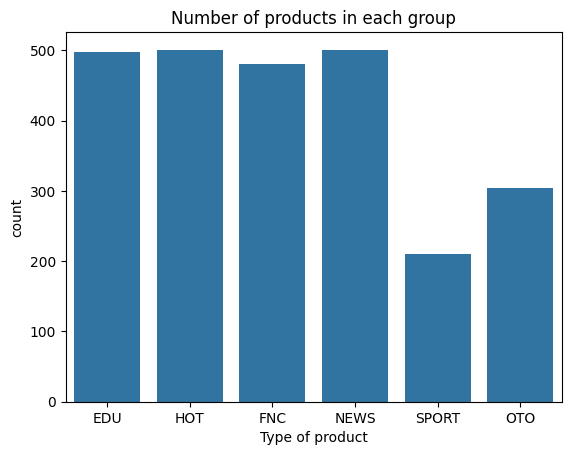

In [113]:
#Visualisasi data dalam bentuk diagram
sns.countplot(x='Kategori',data=text_df)
plt.xlabel('Type of product')
plt.title('Number of products in each group');

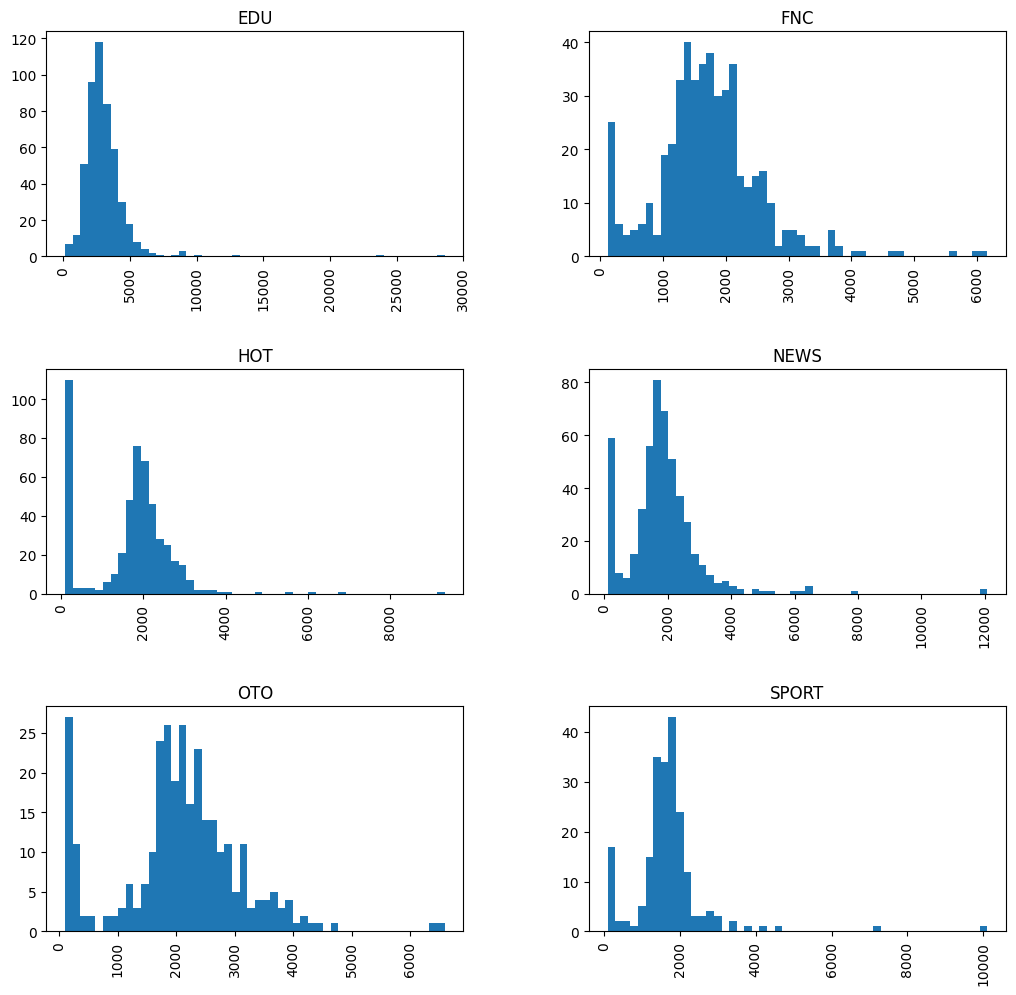

In [73]:
# Visualisasi data dalam bentuk Histogram
text_df.hist(column='length', by='Kategori', bins=50,figsize=(12,12));

# Text Preprocessing

---

# Cleaning


membersihkan data dari url, hex characters, baris baru (\n), mention, hashtag, single char (contoh: a), angka, spasi dari awal teks, dan multiplechar (contoh: enggggggga)

In [115]:
def cleaning(text):
  #remove url
  text = re.sub(r"http\S+", "", text)
  #remove hex characters
  text = re.sub(r'(\\x(.){2})', '', text)
  #remove newlines
  text = re.sub(r'\s+|\\n', ' ', text)
  #remove hashtags
  text = re.sub(r'\B#\w*[a-zA-Z]+\w*','', text)
  #remove single char
  text = re.sub(r'\b[a-zA-Z]\b','', text)
  #remove number
  text = re.sub(r'\d+','', text)
  #remove punctuation / tanda baca
  text = re.sub(r'[^\w\s]+', ' ', text)
  #remove spasi dari awal teks
  text = re.sub(r"/^\\s+/m", '', text)
  #remove character yang memilliki kurang dari 3 huruf
  text = re.sub(r'\b\w{1,3}\b', '', text)
  return text

df['Cleaning'] = df['text'].apply(cleaning)

In [116]:
for i in df.loc[2][['text','Cleaning']]:
    print(i,'\n')

Pemerintah Provinsi DKI Jakarta melalui Kepala Dinas Pendidikan telah mengeluarkan aturan penyelenggaraan PTM Terbatas 2022. Aturan tersebut dikeluarkan melalui SK nomor 1363 tahun 2021 yang ditandatangani oleh Kadisdik Nahdiana 29 Desember 2021 lalu. Jika mengikuti kalender akademik dari Disdik DKI Jakarta, maka aturan tersebut sudah berlaku di sekolah Jakarta pada hari pertama atau awal semester genap TA 2021/2022 dimulai yakni Senin tanggal 3 Januari 2022. Berdasarkan SK yang dikeluarkan, sekolah di wilayah PPKM level 1 sampai 2 wajib menggelar sekolah tatap muka setiap hari dengan kapasitas siswa 100% dan durasi maksimal 6 jam pelajaran. Itu artinya seluruh wilayah DKI Jakarta yang saat ini berada pada PPKM level 1 sudah bisa menyelenggarakan PTM Terbatas dengan kapasitas siswa 100%. Bahkan siswa bisa melakukan sekolah tatap muka setiap hari dengan durasi belajar paling banyak 6 jam pelajaran per hari. Namun perlu dicatat, bahwa sekolah bisa mengikuti aturan 100% tersebut dengan sy

# Case Folding

Mengubah huruf kapital menjadi huruf kecil, agar kata seperti "Tes" dan "tes" menjadi "tes" dan "tes" (seragam)

In [117]:
df['Casefolding'] = df['Cleaning'].str.lower()

In [118]:
for i in df.loc[2][['Cleaning','Casefolding']]:
    print(i,'\n')

Pemerintah Provinsi  Jakarta melalui Kepala Dinas Pendidikan telah mengeluarkan aturan penyelenggaraan  Terbatas   Aturan tersebut dikeluarkan melalui  nomor  tahun  yang ditandatangani oleh Kadisdik Nahdiana  Desember  lalu  Jika mengikuti kalender akademik dari Disdik  Jakarta  maka aturan tersebut sudah berlaku  sekolah Jakarta pada hari pertama atau awal semester genap    dimulai yakni Senin tanggal  Januari   Berdasarkan  yang dikeluarkan  sekolah  wilayah PPKM level  sampai  wajib menggelar sekolah tatap muka setiap hari dengan kapasitas siswa    durasi maksimal   pelajaran   artinya seluruh wilayah  Jakarta yang saat  berada pada PPKM level  sudah bisa menyelenggarakan  Terbatas dengan kapasitas siswa   Bahkan siswa bisa melakukan sekolah tatap muka setiap hari dengan durasi belajar paling banyak   pelajaran  hari  Namun perlu dicatat  bahwa sekolah bisa mengikuti aturan   tersebut dengan syarat minimal   guru atau tenaga kependidikan  sekolah tersebut sudah menerima vaksin dosi

# Tokenizing 

memisahkan kalimat menjadi potongan kata dengan menggunakan library word_tokenize dari nltk

In [119]:
df['Tokenized'] = df['Casefolding'].apply(word_tokenize)

In [120]:
for i in df.loc[2][['Casefolding','Tokenized']]:
    print(i,'\n')

pemerintah provinsi  jakarta melalui kepala dinas pendidikan telah mengeluarkan aturan penyelenggaraan  terbatas   aturan tersebut dikeluarkan melalui  nomor  tahun  yang ditandatangani oleh kadisdik nahdiana  desember  lalu  jika mengikuti kalender akademik dari disdik  jakarta  maka aturan tersebut sudah berlaku  sekolah jakarta pada hari pertama atau awal semester genap    dimulai yakni senin tanggal  januari   berdasarkan  yang dikeluarkan  sekolah  wilayah ppkm level  sampai  wajib menggelar sekolah tatap muka setiap hari dengan kapasitas siswa    durasi maksimal   pelajaran   artinya seluruh wilayah  jakarta yang saat  berada pada ppkm level  sudah bisa menyelenggarakan  terbatas dengan kapasitas siswa   bahkan siswa bisa melakukan sekolah tatap muka setiap hari dengan durasi belajar paling banyak   pelajaran  hari  namun perlu dicatat  bahwa sekolah bisa mengikuti aturan   tersebut dengan syarat minimal   guru atau tenaga kependidikan  sekolah tersebut sudah menerima vaksin dosi

# Normalisasis
mengubah kata seperti kata gaul dan singkatan menjadi kata normalnya contoh: 7an -> tujuan

sumber file: https://github.com/louisowen6/NLP_bahasa_resources

In [123]:
#membaca data dan mengubahnya menjadi dictionary
file = open("combined_slang_words.txt", "r")

contents = file.read()
kamus = ast.literal_eval(contents)

file.close()
print(type(kamus))
kamus

<class 'dict'>


{'@': 'di',
 'abis': 'habis',
 'ad': 'ada',
 'adlh': 'adalah',
 'afaik': 'as far as i know',
 'ahaha': 'haha',
 'aj': 'saja',
 'ajep-ajep': 'dunia gemerlap',
 'ak': 'saya',
 'akika': 'aku',
 'akkoh': 'aku',
 'akuwh': 'aku',
 'alay': 'norak',
 'alow': 'halo',
 'ambilin': 'ambilkan',
 'ancur': 'hancur',
 'anjrit': 'anjing',
 'anter': 'antar',
 'ap2': 'apa-apa',
 'apasih': 'apa sih',
 'apes': 'sial',
 'aps': 'apa',
 'aq': 'saya',
 'aquwh': 'aku',
 'asbun': 'asal bunyi',
 'aseekk': 'asyik',
 'asekk': 'asyik',
 'asem': 'asam',
 'aspal': 'asli tetapi palsu',
 'astul': 'asal tulis',
 'ato': 'atau',
 'au ah': 'tidak mau tahu',
 'awak': 'saya',
 'ay': 'sayang',
 'ayank': 'sayang',
 'b4': 'sebelum',
 'bakalan': 'akan',
 'bandes': 'bantuan desa',
 'bangedh': 'banget',
 'banpol': 'bantuan polisi',
 'banpur': 'bantuan tempur',
 'basbang': 'basi',
 'bcanda': 'bercanda',
 'bdg': 'bandung',
 'begajulan': 'nakal',
 'beliin': 'belikan',
 'bencong': 'banci',
 'bentar': 'sebentar',
 'ber3': 'bertiga',
 'b

In [124]:
#contoh penggunaan normalisasi
text = df["Tokenized"][4]
final_string = ' '.join(str(kamus.get(word, word)) for word in text).split()
final_string

['membuat',
 'curriculum',
 'vitae',
 'surat',
 'lamaran',
 'kerja',
 'yang',
 'baik',
 'efektif',
 'merupakan',
 'yang',
 'tidak',
 'dipelajari',
 'ketika',
 'sekolah',
 'maupun',
 'kuliah',
 'oleh',
 'karena',
 'seseorang',
 'perlu',
 'mempelajarinya',
 'untuk',
 'memulai',
 'karier',
 'sebuah',
 'industri',
 'pada',
 'modern',
 'seperti',
 'saat',
 'internet',
 'telah',
 'menyediakan',
 'banyak',
 'contoh',
 'atau',
 'tips',
 'membuat',
 'surat',
 'lamaran',
 'namun',
 'perlu',
 'diperhatikan',
 'bahwa',
 'contoh',
 'bukan',
 'hanya',
 'untuk',
 'ditiru',
 'tapi',
 'dijadikan',
 'inspirasi',
 'menurut',
 'pakar',
 'karier',
 'dari',
 'harvard',
 'extension',
 'school',
 'linda',
 'spencer',
 'terdapat',
 'kunci',
 'agar',
 'surat',
 'lamaran',
 'terlihat',
 'sempurna',
 'pertama',
 'dengan',
 'menyampaikan',
 'bahwa',
 'pelamar',
 'adalah',
 'orang',
 'yang',
 'tepat',
 'untuk',
 'posisi',
 'tersebut',
 'kedua',
 'pelamar',
 'akan',
 'memberikan',
 'nilai',
 'tambah',
 'kepada',
 'p

Hasil diatas merupakan hasil penggunaan normalisasi baris ke 3

In [125]:
for i,j in zip(text,final_string):
    if (i != j):
        print(i,j)

In [126]:
## Change word

def normalisasi(text):
    final_string = ' '.join(str(kamus.get(word, word)) for word in text).split()
    return final_string

df['Normalisasi'] = df['Tokenized'].apply(normalisasi)

In [127]:
for i,j in zip(df.loc[2]['Tokenized'], df.loc[2]['Normalisasi']):
    if i != j:
        print(i,j)

# Menghapus Stopword

Menghilangkan kata yang tidak terlalu penting, namun sering muncul (stop word)
contoh : yang
pengahapusan stopword menggunakan library nltk yang sudah menyediakan daftar kata stopword indonesia dan stopword english


In [128]:
#mengambil stopword dari library python sastrawi
listStopword = set(stopwords.words('indonesian'))
listStopword.update(set(stopwords.words('english')))

def stopwords_removal(words):
    return [word for word in words if word not in listStopword]

df['Removed Stopwords'] = df['Normalisasi'].apply(stopwords_removal)

In [129]:
for i in df.loc[2][['Normalisasi','Removed Stopwords']]:
    print(i,'\n')

['pemerintah', 'provinsi', 'jakarta', 'melalui', 'kepala', 'dinas', 'pendidikan', 'telah', 'mengeluarkan', 'aturan', 'penyelenggaraan', 'terbatas', 'aturan', 'tersebut', 'dikeluarkan', 'melalui', 'nomor', 'tahun', 'yang', 'ditandatangani', 'oleh', 'kadisdik', 'nahdiana', 'desember', 'lalu', 'jika', 'mengikuti', 'kalender', 'akademik', 'dari', 'disdik', 'jakarta', 'maka', 'aturan', 'tersebut', 'sudah', 'berlaku', 'sekolah', 'jakarta', 'pada', 'hari', 'pertama', 'atau', 'awal', 'semester', 'genap', 'dimulai', 'yakni', 'senin', 'tanggal', 'januari', 'berdasarkan', 'yang', 'dikeluarkan', 'sekolah', 'wilayah', 'ppkm', 'level', 'sampai', 'wajib', 'menggelar', 'sekolah', 'tatap', 'muka', 'setiap', 'hari', 'dengan', 'kapasitas', 'siswa', 'durasi', 'maksimal', 'pelajaran', 'artinya', 'seluruh', 'wilayah', 'jakarta', 'yang', 'saat', 'berada', 'pada', 'ppkm', 'level', 'sudah', 'bisa', 'menyelenggarakan', 'terbatas', 'dengan', 'kapasitas', 'siswa', 'bahkan', 'siswa', 'bisa', 'melakukan', 'sekolah'

In [130]:
#mengembalikan token menjadi string tunggal kembali untuk stemming
def untokenize(text):
    
    text = ' '.join(text)
    step1 = text.replace("`` ", '"').replace(" ''", '"').replace('. . .',  '...')
    step2 = step1.replace(" ( ", " (").replace(" ) ", ") ")
    step3 = re.sub(r' ([.,:;?!%]+)([ \'"`])', r"\1\2", step2)
    step4 = re.sub(r' ([.,:;?!%]+)$', r"\1", step3)
    step5 = step4.replace(" '", "'").replace(" n't", "n't").replace(
         "can not", "cannot")
    step6 = step5.replace(" ` ", " '")
    return step6.strip()

df['Untokenized'] = df['Removed Stopwords'].apply(untokenize)

In [131]:
for i in df.loc[2][['Removed Stopwords','Untokenized']]:
    print(i,'\n')

['pemerintah', 'provinsi', 'jakarta', 'kepala', 'dinas', 'pendidikan', 'mengeluarkan', 'aturan', 'penyelenggaraan', 'terbatas', 'aturan', 'dikeluarkan', 'nomor', 'ditandatangani', 'kadisdik', 'nahdiana', 'desember', 'mengikuti', 'kalender', 'akademik', 'disdik', 'jakarta', 'aturan', 'berlaku', 'sekolah', 'jakarta', 'semester', 'genap', 'senin', 'tanggal', 'januari', 'berdasarkan', 'dikeluarkan', 'sekolah', 'wilayah', 'ppkm', 'level', 'wajib', 'menggelar', 'sekolah', 'tatap', 'muka', 'kapasitas', 'siswa', 'durasi', 'maksimal', 'pelajaran', 'wilayah', 'jakarta', 'ppkm', 'level', 'menyelenggarakan', 'terbatas', 'kapasitas', 'siswa', 'siswa', 'sekolah', 'tatap', 'muka', 'durasi', 'belajar', 'pelajaran', 'dicatat', 'sekolah', 'mengikuti', 'aturan', 'syarat', 'minimal', 'guru', 'tenaga', 'kependidikan', 'sekolah', 'menerima', 'vaksin', 'dosis', 'minimal', 'warga', 'masyarakat', 'kabupaten', 'kota', 'sekolah', 'divaksin', 'terbatas', 'kelas', 'dilaksanakan', 'menerapkan', 'protokol', 'kesehat

# Lemmatization

Lemmatization merupakan proses untuk mengubah kata yang memiliki tambahan kata dari kata dasarnya menjadi bentuk dasarnya, seperti kata see, saw dan seen. akan diubah menjadi see.

In [132]:
#melakukan lemmatization untuk kalimat dengan bahasa inggris
lemmatizer = WordNetLemmatizer()

def lemmatize(text):
    text = lemmatizer.lemmatize(text)
    return text

df['Lemmatized'] = df['Untokenized'].apply(lemmatize)

In [133]:
for i in df.loc[2][['Untokenized','Lemmatized']]:
    print(i,'\n')

pemerintah provinsi jakarta kepala dinas pendidikan mengeluarkan aturan penyelenggaraan terbatas aturan dikeluarkan nomor ditandatangani kadisdik nahdiana desember mengikuti kalender akademik disdik jakarta aturan berlaku sekolah jakarta semester genap senin tanggal januari berdasarkan dikeluarkan sekolah wilayah ppkm level wajib menggelar sekolah tatap muka kapasitas siswa durasi maksimal pelajaran wilayah jakarta ppkm level menyelenggarakan terbatas kapasitas siswa siswa sekolah tatap muka durasi belajar pelajaran dicatat sekolah mengikuti aturan syarat minimal guru tenaga kependidikan sekolah menerima vaksin dosis minimal warga masyarakat kabupaten kota sekolah divaksin terbatas kelas dilaksanakan menerapkan protokol kesehatan diatur satuan pendidikan masker sesuai ketentuan menutupi hidung mulut dagu menerapkan jaga jarak orang kursi meja meter menghindari kontak fisik meminjam peralatan perlengkapan belajar berbagi makanan minuman makan minum berhadapan berdekatan menerapkan etika

Export data yang sudah bersih

In [134]:
df.to_csv('Cleaned_CNN.csv',index=False)

# TF-IDF
setelah kita selesai membersihkan data kita, sekarang kita masuk ke TF-IDF. TF-IDF merupakan metode untuk mengubah kalimat menjadi matrix. Juga berguna untuk memilih fitur yang berguna dengan mempertimbangkan kemunculan kata (TF) beserta inverse dari frekuensi kata pada keseluruhan dokumen

In [135]:
#membangun objek dari class tfidf
v = TfidfVectorizer(ngram_range=(2,3),min_df= 3)

#mengubah kolom data yang sudah bersih menjadi matrix
X = v.fit_transform(df['Lemmatized'])

In [136]:
#melihat jumlah baris dan kolom dari data
X.shape

(2493, 21141)

In [137]:
X.shape

(2493, 21141)

In [138]:

len(df)

2493

In [139]:
#bila kita ingin melihat fitur-fitur
v.get_feature_names_out()

array(['aamiin allah', 'aamiin simak', 'aamiin simak video', ...,
       'الله عليه', 'الله عليه وسلم', 'عليه وسلم'], dtype=object)

# Melakukan encoding pada target / dependent variable
Dikarenakan variable masih berbentuk string, kita perlu mengubahnya menjadi numerik. Sebelum itu, kita perlu melihat terlebih dahulu banyaknya class pada target variable

In [140]:
df['Kategori'].unique()

array(['EDU', 'HOT', 'FNC', 'NEWS', 'BOLA', 'OTO'], dtype=object)

In [141]:
encoder = LabelEncoder()
y = encoder.fit_transform(df['Kategori'])
y

array([1, 1, 1, ..., 5, 5, 5])

In [142]:
Kategori,count = np.unique(y,return_counts=True)
dict(zip(Kategori,count))

{np.int64(0): np.int64(210),
 np.int64(1): np.int64(498),
 np.int64(2): np.int64(480),
 np.int64(3): np.int64(501),
 np.int64(4): np.int64(500),
 np.int64(5): np.int64(304)}

dikarenakan jumlah perbandingan kategori sangat tidak imbang, kita menemui permasalahan Imbalanced class. Imbalanced class dapat mengakibatkan performansi model yang buruk. Untuk mengatasi imbalanced class kita dapat menggunakan teknik oversampling atau undersampling. Pada skenario ini, kami menggunakan metode oversampling dengan menggunakan modul bernama SMOTE

# Oversampling 

In [143]:
oversample = SMOTE()
X,y = oversample.fit_resample(X,y)

In [144]:
category,count = np.unique(y,return_counts=True)
dict(zip(category,count))

{np.int64(0): np.int64(501),
 np.int64(1): np.int64(501),
 np.int64(2): np.int64(501),
 np.int64(3): np.int64(501),
 np.int64(4): np.int64(501),
 np.int64(5): np.int64(501)}

# Spliting data 

membagi data menjadi 2, data training dan data test.
dimana data training 80% dan data test 20%

In [145]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2, random_state = 25)

In [146]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(2404, 21141)
(2404,)
(602, 21141)
(602,)


# Membangun model 
---

Pada kesempatan kali ini saya akan menggunakan model SVM, naive bayes dan Random forest. 

Alasan menggunakan SVM, Naive Bayes dan Random forest

1. Support Vector Machine (SVM)

    Keunggulan:
    
    ---
    
        a. Efektif untuk data teks: SVM bekerja baik pada data berdimensi tinggi seperti teks, karena dapat memisahkan kelas dengan margin maksimum.
        b. Robust terhadap overfitting: Dengan penggunaan kernel trick, SVM mampu menangani data yang tidak linear dan mencegah overfitting.
        c. Akurasi tinggi: Sangat cocok untuk dataset yang bersifat seimbang atau hampir seimbang dalam jumlah data tiap kategori.
    Cocok digunakan jika:

    ---
    
        a. Dataset berita memiliki kategori dengan batasan yang tegas (misalnya, berita olahraga dan teknologi jarang tumpang tindih).
        b. Teks sudah diproses dan diubah menjadi representasi seperti TF-IDF atau word embeddings.


2. Naive Bayes

    Keunggulan:
    
    ---

        a. Cepat dan sederhana: Naive Bayes sangat cepat dalam proses training, sehingga cocok untuk dataset besar.
        b. Efektif pada data teks: Mengandalkan asumsi independensi antar fitur, yang meskipun sering tidak realistis, memberikan hasil yang baik untuk klasifikasi teks.
        c. Mengatasi sparsity: Mampu menangani data dengan banyak fitur yang sparse (seperti representasi Bag of Words atau TF-IDF).
    Cocok digunakan jika:

    ---

        a. Dataset berita besar dengan kategori yang cukup jelas (misalnya, politik, ekonomi, dan hiburan).
        b. Cepat mendapatkan hasil lebih penting daripada akurasi maksimal.
        c. Dataset mungkin memiliki sedikit ketidakseimbangan antar kategori.

3. Random Forest

    Keunggulan:

    ---

        a. Mampu menangani non-linearitas: Kombinasi pohon keputusan membuat Random Forest lebih fleksibel dalam memisahkan data yang kompleks.
        b. Robust terhadap overfitting: Karena melakukan ensemble dari banyak pohon keputusan, model ini lebih stabil dibandingkan satu pohon saja.
        c. Feature importance: Memberikan informasi tentang fitur (kata-kata) yang paling penting dalam klasifikasi.
    Cocok digunakan jika:
    
    ---

        a. Dataset berita memiliki kategori yang tumpang tindih atau lebih kompleks.
        b. Ada kebutuhan untuk interpretasi fitur mana yang paling relevan untuk kategori tertentu.

In [147]:
#SVM
SVM = svm.SVC(C=1.0, kernel="linear", degree=3, gamma = "scale")
SVM.fit(X_train,y_train)

predictions_SVM = SVM.predict(X_test)

In [148]:
#naive_bayes
NB = naive_bayes.MultinomialNB()
NB.fit(X_train, y_train)

predictions_NB = NB.predict(X_test)

In [149]:
#Random Forest
RF = RandomForestClassifier()
RF.fit(X_train, y_train)

predictions_RF = RF.predict(X_test)

# Evaluasi

In [151]:

dict_accuracy_score = {
    "SVM": accuracy_score(predictions_SVM,y_test) * 100,
    "Naive Bayes": accuracy_score(predictions_NB,y_test) * 100,
    "Random Forest": accuracy_score(predictions_RF,y_test) * 100
} 

df_accuracy = pd.DataFrame.from_dict(dict_accuracy_score, orient="index", columns = ["accuracy_score"])
df_accuracy.sort_values(by="accuracy_score", ascending = False)

,accuracy_score
SVM,89.867110
Naive Bayes,88.205980
Random Forest,77.574751


<Axes: >

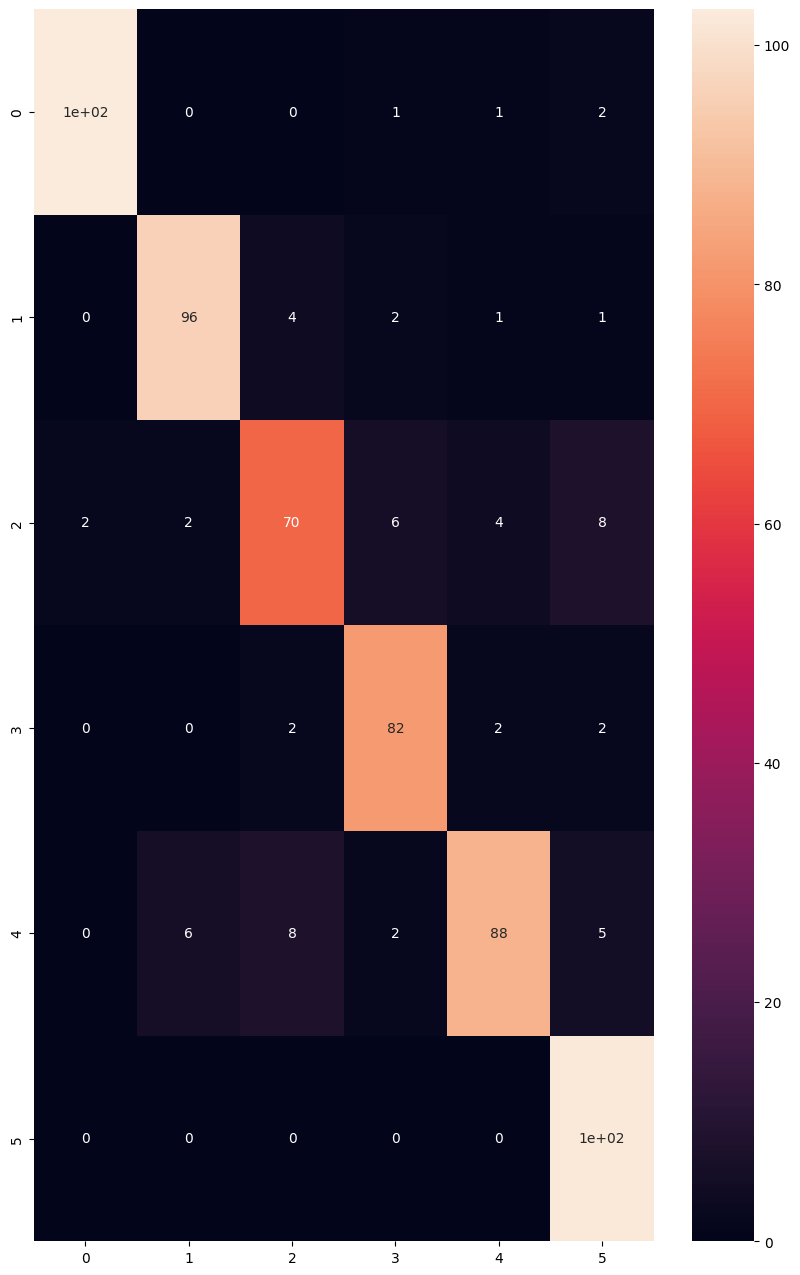

In [152]:
cm = confusion_matrix(y_test,predictions_SVM)
plt.figure(figsize=(10,16))
sns.heatmap(cm, annot=True)

In [153]:
print(classification_report(y_test,predictions_SVM))

              precision    recall  f1-score   support

           0       0.98      0.96      0.97       107
           1       0.92      0.92      0.92       104
           2       0.83      0.76      0.80        92
           3       0.88      0.93      0.91        88
           4       0.92      0.81      0.86       109
           5       0.85      1.00      0.92       102

    accuracy                           0.90       602
   macro avg       0.90      0.90      0.90       602
weighted avg       0.90      0.90      0.90       602



Berdasarkan hasil eksperimen, model SVM berhasil mencapai akurasi tertinggi dalam mengklasifikasikan berita Indonesia menjadi beberapa kategori, yaitu sebesar 89.86%. Hal ini menunjukkan bahwa SVM mampu menangkap pola yang kompleks dalam data teks berita. Di sisi lain, model Naive Bayes juga memberikan hasil yang cukup baik dengan akurasi 88.21%. Namun, model Random Forest masih perlu ditingkatkan performanya. Hasil penelitian ini mengindikasikan bahwa pemilihan algoritma SVM dapat menjadi pilihan yang tepat untuk membangun sistem klasifikasi berita Indonesia yang lebih akurat.